In [870]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


In [871]:
#Importing the datas
leadscore = pd.read_csv(r'C:\Users\Advaith R\Downloads\Lead Scoring Assignment\Leads.csv')
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [872]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [873]:
#As we can see from the data, many columns contain text values as 'Select', which means null actually.
#Hence we convert them to null

In [874]:
leadscore.replace('Select', np.nan, inplace=True)

In [875]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [876]:
# Column-wise null percentages
round(100*(leadscore.isnull().sum()/len(leadscore.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [877]:
#As we can see, many columns contain null values, which will hamper our model
#Hence, let us drop columns that is having null percentage greater than 45%
leadscore = leadscore.drop(['How did you hear about X Education',
                            'Lead Quality',
                            'Lead Profile',
                            'Asymmetrique Activity Index',                       
                            'Asymmetrique Profile Index',
                            'Asymmetrique Activity Score',                      
                            'Asymmetrique Profile Score'],
                       axis=1)

In [878]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [879]:
# Column-wise null percentages
round(100*(leadscore.isnull().sum()/len(leadscore.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [880]:
leadscore['Country'].value_counts(normalize=True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Nigeria                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Canada                   0.059006
Sweden                   0.044254
Netherlands              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
China                    0.029503
Belgium                  0.029503
Italy                    0.029503
Ghana                    0.029503
Philippines              0.029503
Tanzania                 0.014751
Sri Lanka     

In [541]:
#We can drop columns like country as these columns tend to have a very high percentage of only one particular value.


In [542]:
leadscore['What is your current occupation'].value_counts(normalize=True) * 100   

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [543]:
leadscore['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [544]:
leadscore['Search'].value_counts(normalize=True) * 100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [545]:
leadscore['Magazine'].value_counts(normalize=True) * 100

No    100.0
Name: Magazine, dtype: float64

In [546]:
leadscore['Newspaper Article'].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [156]:
leadscore['X Education Forums'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [157]:
leadscore['Newspaper'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [158]:
leadscore['Digital Advertisement'].value_counts(normalize=True) * 100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [159]:
leadscore['Through Recommendations'].value_counts(normalize=True) * 100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [160]:
leadscore['Receive More Updates About Our Courses'].value_counts(normalize=True) * 100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [162]:
leadscore['Update me on Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [163]:
leadscore['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [164]:
leadscore['I agree to pay the amount through cheque'].value_counts(normalize=True) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [167]:
leadscore['Do Not Email'].value_counts(normalize=True) * 100  

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [168]:
leadscore['Do Not Call'].value_counts(normalize=True) * 100  

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [881]:
leadscore = leadscore.drop(['Country',
                            'What matters most to you in choosing a course',
                            'Search',
                            'Magazine',                       
                            'Newspaper Article',
                            'X Education Forums',                      
                            'Newspaper',
                            'Digital Advertisement',
                            'Through Recommendations',
                            'Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content',
                            'Get updates on DM Content',
                            'I agree to pay the amount through cheque',
                            'Tags',
                            'Do Not Call',
                            'Do Not Email'],
                       axis=1)

In [882]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            5860 non-null object
What is your current occupation           6550 non-null object
City                                      5571 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: floa

In [549]:
# Column-wise null percentages
round(100*(leadscore.isnull().sum()/len(leadscore.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [883]:
#Last activity is something the sales teams updates( indicated by the value Converted to lead). hence we drop this column
leadscore = leadscore.drop('Last Activity',axis=1)

In [551]:
leadscore['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [ ]:
#in some of the columns, there are a lot of categories with very less number of rows, as shown above.
#hence we club them all in ome category called others:

In [905]:
#1. Lead Activity
leadscore = leadscore.replace(to_replace =["Page Visited on Website",
                               "Olark Chat Conversation",                    
                               "Email Link Clicked",
                               "Email Bounced",                 
                               "Unsubscribed",                
                               "Unreachable",                            
                               "Had a Phone Conversation",                     
                               "Email Marked Spam",                
                               "View in browser link Clicked",                            
                               "Approached upfront",
                               "Email Received",
                               "Form Submitted on Website",
                                "Resubscribed to emails"],value ="Other Activities")

In [906]:
#2. Specialization
leadscore = leadscore.replace(to_replace =["Media and Advertising",
                               "Travel and Tourism",                    
                               "International Business",
                               "Healthcare Management",                 
                               "Hospitality Management",                
                               "E-COMMERCE",                            
                               "Retail Management",                     
                               "Rural and Agribusiness",                
                               "E-Business",                            
                               "Services Excellence"],value ="Others Specialization")

In [907]:
#3. lead Source
leadscore = leadscore.replace(to_replace =["Reference",
                               "Welingak Website",                    
                               "Referral Sites",
                               "Facebook",                 
                               "bing",                
                               "google",                            
                               "Click2call",                     
                               "Social Media",                
                               "Press_Release",                            
                               "Live Chat",
                               "testone",
                               "youtubechannel",
                                "WeLearn",
                                "welearnblog_Home",
                                "Pay per Click Ads",
                                "NC_EDM",
                                "blog"],value ="Other Sources")

In [908]:
#4. What is your occupation
leadscore = leadscore.replace(to_replace =["Student",
                               "Other",                    
                               "Housewife",
                               "Businessman"],value ="Other Occupation")

In [909]:
#5.Lead Origin
leadscore = leadscore.replace(to_replace =["Lead Add Form",
                               "Lead Import",                    
                               "Quick Add Form"],value ="Other Origin")

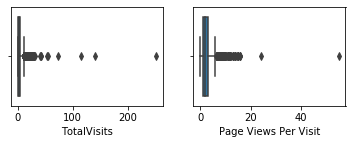

In [558]:
#Here, we can impute TotalVisits and Page Views Per Visit with median or mean
plt.subplot(2,2,1)
sns.boxplot(leadscore['TotalVisits'])
plt.subplot(2,2,2)
sns.boxplot(leadscore['Page Views Per Visit'])
plt.show()

In [884]:
leadscore['TotalVisits'].fillna((leadscore['TotalVisits'].median()), inplace=True)

In [885]:
leadscore['Page Views Per Visit'].value_counts(normalize=True) * 100

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
1.27     0.010985
8.21     0.010985
2.14     0.010985
2.63     0.010985
2.45     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

In [886]:
page_mode = leadscore['Page Views Per Visit'].mode()[0]
leadscore['Page Views Per Visit'].fillna(page_mode,inplace=True)

In [887]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,NaN,Unemployed,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,NaN,Unemployed,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,NaN,Unemployed,Mumbai,No,Modified


In [888]:
#Now let us do the imputation in case of categorical columns

In [889]:
# Column-wise null percentages
round(100*(leadscore.isnull().sum()/len(leadscore.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [890]:
leadscore['Specialization'].value_counts(normalize=True) * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [891]:
#As there is no specific category that we can fill the values with, we add a new category called missing and during the creation
#of dummy variables, we remove the missing column
leadscore["Specialization"].fillna("Missing", inplace = True) 

In [892]:
leadscore['Lead Source'].value_counts(normalize=True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
testone               0.010865
youtubechannel        0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [893]:
#here since the missing values % is just 0.7%, we impute it with google
leadscore['Lead Source'].fillna('Google', inplace=True)

In [894]:
leadscore['What is your current occupation'].value_counts(normalize=True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [895]:
occ_mode = leadscore['What is your current occupation'].mode()[0]
leadscore['What is your current occupation'].fillna(occ_mode,inplace=True)

In [896]:
#For the city column, its better we drop the column itself
leadscore['City'].value_counts(normalize=True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [897]:
leadscore = leadscore.drop('City',axis=1)

In [898]:
#Prospect ID is an unique ID like lead number, hence we drop one of them
leadscore = leadscore.drop('Prospect ID',axis=1)

In [899]:
# Column-wise null percentages
round(100*(leadscore.isnull().sum()/len(leadscore.index)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [900]:
leadscore.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Missing,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Missing,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Missing,Unemployed,No,Modified


In [ ]:
#Data Visualisation
#Performing EDA with various variables

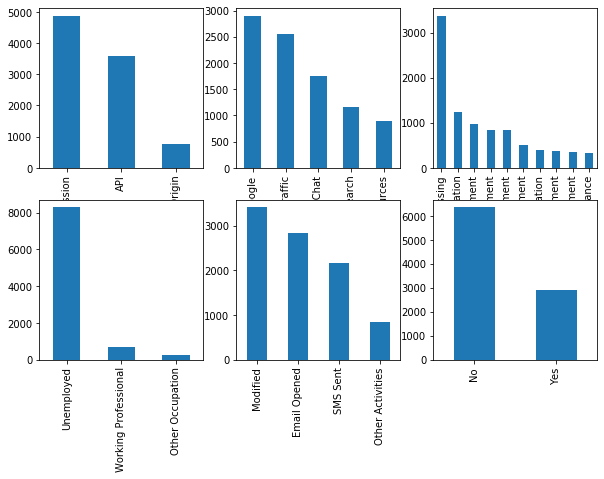

In [911]:
#Plotting categorical variables
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
leadscore['Lead Origin'].value_counts().plot(kind='bar')
plt.subplot(3,3,2)
leadscore['Lead Source'].value_counts().plot(kind='bar')
plt.subplot(3,3,3)
leadscore['Specialization'].value_counts().plot(kind='bar')
plt.subplot(3,3,4)
leadscore['What is your current occupation'].value_counts().plot(kind='bar')
plt.subplot(3,3,5)
leadscore['Last Notable Activity'].value_counts().plot(kind='bar')
plt.subplot(3,3,6)
leadscore['A free copy of Mastering The Interview'].value_counts().plot(kind='bar')
plt.show()

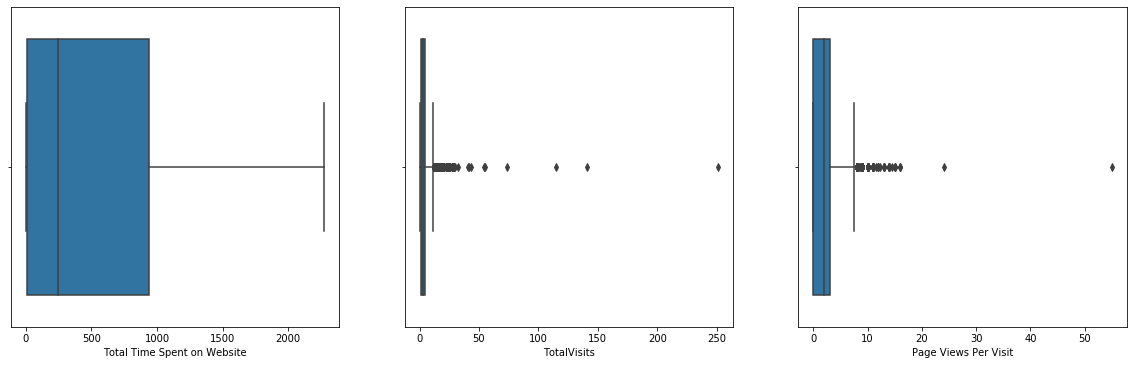

In [509]:
#Plotting numerical variables
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(leadscore['Total Time Spent on Website'])
plt.subplot(3,3,2)
sns.boxplot(leadscore['TotalVisits'])
plt.subplot(3,3,3)
sns.boxplot(leadscore['Page Views Per Visit'])

In [575]:
#For the columns TotalVisits and Page Views Per Visit, we will be capping the higher range 
q1 = leadscore['TotalVisits'].quantile(0.99)
leadscore['TotalVisits'][leadscore['TotalVisits']>=q1] = q1
q2 = leadscore['Page Views Per Visit'].quantile(0.99)
leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit']>=q2] = q2

In [576]:
#Mapping A free copy of Mastering The Interview variables to yes=1 and no=0
leadscore[['A free copy of Mastering The Interview']]=leadscore[['A free copy of Mastering The Interview']].apply(lambda x: x.map({'Yes': 1,'No':0}))
leadscore.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Missing,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Missing,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Other Occupation,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others Specialization,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Missing,Unemployed,0,Modified


In [868]:
#Dummy Variables


In [578]:
#1.Specialization

#Dropping the first column
spec1 = pd.get_dummies(leadscore['Specialization'], drop_first = True)

# Add the results to the original bike dataframe
leadscore = pd.concat([leadscore, spec1], axis = 1)

# Drop 'Specialization' as we have created the dummies for it
leadscore.drop(['Specialization'], axis = 1, inplace = True)

leadscore.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Missing,Operations Management,Others Specialization,Supply Chain Management
0,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,0,0,0,1,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other Occupation,1,Email Opened,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0


In [579]:
leadscore = leadscore.drop('Missing',axis=1)

In [581]:
#2.What is your current occupation

#Dropping the first column
occ1 = pd.get_dummies(leadscore['What is your current occupation'], drop_first = True)

# Add the results to the original bike dataframe
leadscore = pd.concat([leadscore, occ1], axis = 1)

# Drop 'What is your current occupation' as we have created the dummies for it
leadscore.drop(['What is your current occupation'], axis = 1, inplace = True)

leadscore.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Others Specialization,Supply Chain Management,Unemployed,Working Professional
0,660737,API,Olark Chat,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,1,Email Opened,1,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,0,Modified,0,0,0,0,0,0,1,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,0,Modified,0,0,0,0,0,0,0,0,1,0


In [582]:
#3.Lead Origin
#Dropping the first column
ori1 = pd.get_dummies(leadscore['Lead Origin'], drop_first = True)

# Add the results to the original bike dataframe
leadscore = pd.concat([leadscore, ori1], axis = 1)

# Drop 'What is your current occupation' as we have created the dummies for it
leadscore.drop(['Lead Origin'], axis = 1, inplace = True)

leadscore.head()

,Lead Number,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Others Specialization,Supply Chain Management,Unemployed,Working Professional,Landing Page Submission,Other Origin
0,660737,Olark Chat,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0
1,660728,Organic Search,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0
2,660727,Direct Traffic,1,2.0,1532,2.0,1,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0
3,660719,Direct Traffic,0,1.0,305,1.0,0,Modified,0,0,0,0,0,0,1,0,1,0,1,0
4,660681,Google,1,2.0,1428,1.0,0,Modified,0,0,0,0,0,0,0,0,1,0,1,0


In [584]:
#4.Lead Source
#Dropping the first column
sou1 = pd.get_dummies(leadscore['Lead Source'], drop_first = True)

# Add the results to the original bike dataframe
leadscore = pd.concat([leadscore, sou1], axis = 1)

# Drop 'What is your current occupation' as we have created the dummies for it
leadscore.drop(['Lead Source'], axis = 1, inplace = True)

leadscore.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Business Administration,Finance Management,Human Resource Management,...,Others Specialization,Supply Chain Management,Unemployed,Working Professional,Landing Page Submission,Other Origin,Google,Olark Chat,Organic Search,Other Sources
0,660737,0,0.0,0,0.0,0,Modified,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,660728,0,5.0,674,2.5,0,Email Opened,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,Email Opened,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,Modified,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,Modified,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [585]:
#5.Last Notable Activity
#Dropping the first column
act1 = pd.get_dummies(leadscore['Last Notable Activity'], drop_first = True)

# Add the results to the original bike dataframe
leadscore = pd.concat([leadscore, act1], axis = 1)

# Drop 'What is your current occupation' as we have created the dummies for it
leadscore.drop(['Last Notable Activity'], axis = 1, inplace = True)

leadscore.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Business Administration,Finance Management,Human Resource Management,IT Projects Management,...,Working Professional,Landing Page Submission,Other Origin,Google,Olark Chat,Organic Search,Other Sources,Modified,Other Activities,SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [782]:
#Splitting the data into test and train sets
# Putting feature variables to X
X = leadscore.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,...,Working Professional,Landing Page Submission,Other Origin,Google,Olark Chat,Organic Search,Other Sources,Modified,Other Activities,SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [783]:
# Putting response variable to y
y = leadscore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [784]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [785]:
#ReScaling
#Rescaling all variables except dummies, using MinMaxScalar

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[var] = scaler.fit_transform(X_train[var])

In [786]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,...,Working Professional,Landing Page Submission,Other Origin,Google,Olark Chat,Organic Search,Other Sources,Modified,Other Activities,SMS Sent
1871,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6795,0.235294,0.214349,0.147778,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0.294118,0.046655,0.277778,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0.294118,0.541373,0.555556,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [787]:
#Looking at correlations

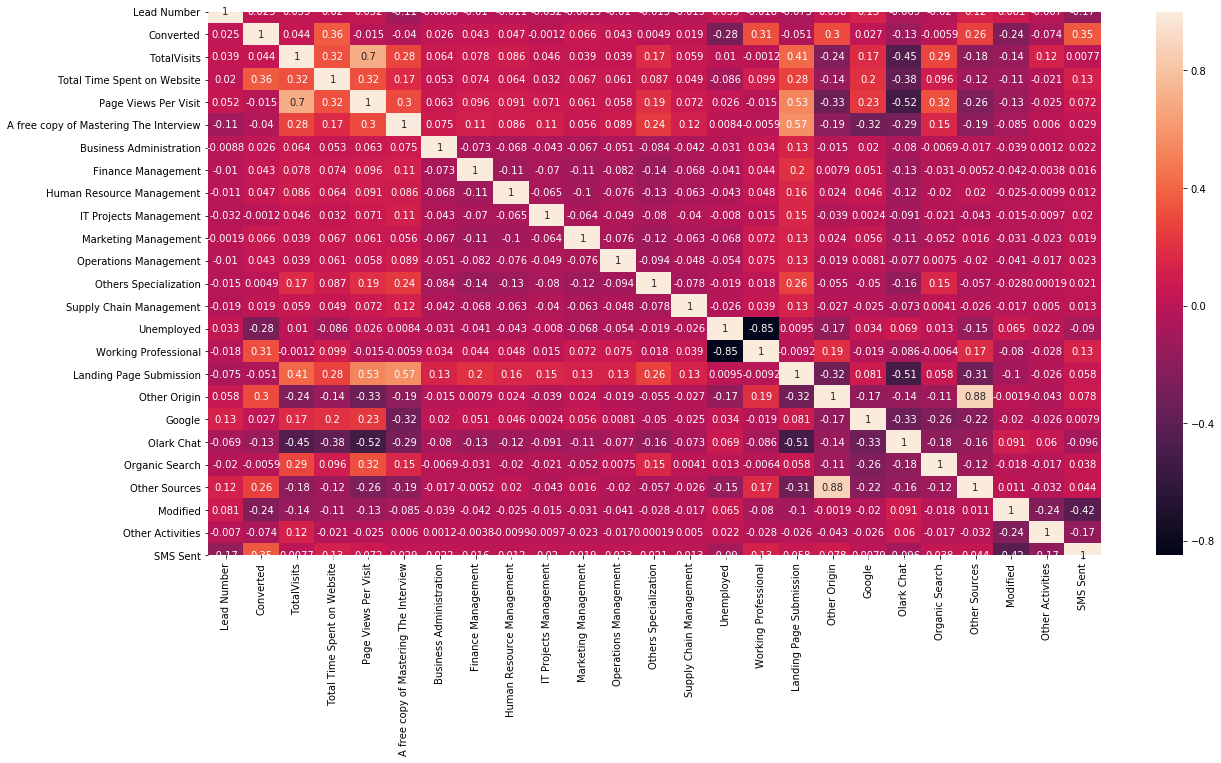

In [788]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leadscore.corr(),annot = True)
plt.show()

In [789]:
#Model Building
import statsmodels.api as sm

In [790]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.9
Date:                Mon, 07 Sep 2020   Deviance:                       5517.9
Time:                        17:19:52   Pearson chi2:                 7.18e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0073      0.250     -8.034      0.000      -2.497      -1.518
TotalVisits                                1.3654      0.243      5.627      0.000       0.890       1.841
Total Time Spent on Website                4.4606      0.163     27.302      0.000       4.140       4.781
Page Views Per Visit                      -0.7990      0.249     -3.210      0.001      -1.287      -0.311
A free copy of Mastering The Interview    -0.1535      0.105     -1.458      0.145      -0.360       0.053
Business Administration                    0.7032      0.189      3.716      0.000       0.332       1.074
Finance Management                         0.9377      0.144      6.515      0.000       0.656       1.220
Human Resource Management                  0.7599      0.147      5.162      0.000       0.471       1.048
IT Projects Management                     0.9467      0.202      4.688      0.000       0.551       1.342
Marketing Management                       0.7984      0.143      5.570      0.000       0.517       1.079
Operations Management                      0.7959      0.174      4.571      0.000       0.455       1.137
Others Specialization                      0.6787      0.138      4.908      0.000       0.408       0.950
Supply Chain Management                    0.8160      0.199      4.108      0.000       0.427       1.205
Unemployed                                -0.4817      0.211     -2.279      0.023      -0.896      -0.068
Working Professional                       2.2366      0.280      7.994      0.000       1.688       2.785
Landing Page Submission                   -0.6438      0.126     -5.115      0.000      -0.891      -0.397
Other Origin                               3.1943      0.277     11.517      0.000       2.651       3.738
Google                                     0.3061      0.112      2.742      0.006       0.087       0.525
Olark Chat                                 1.1242      0.157      7.174      0.000       0.817       1.431
Organic Search                             0.1383      0.129      1.073      0.283      -0.114       0.391
Other Sources                              0.2945      0.256      1.152      0.250      -0.207       0.796
Modified                                  -0.8128      0.085     -9.507      0.000      -0.980      -0.645
Other Activities                          -0.5407      0.132     -4.099      0.000      -0.799      -0.282
SMS Sent                                   1.3542      0.088     15.455      0.000       1.182       1.526
==========================================================================================================
"""

In [791]:
#Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [792]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [793]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True])

In [794]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Business Administration', True, 1),
 ('Finance Management', True, 1),
 ('Human Resource Management', True, 1),
 ('IT Projects Management', True, 1),
 ('Marketing Management', True, 1),
 ('Operations Management', True, 1),
 ('Others Specialization', True, 1),
 ('Supply Chain Management', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Landing Page Submission', True, 1),
 ('Other Origin', True, 1),
 ('Google', False, 2),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 4),
 ('Other Sources', True, 1),
 ('Modified', True, 1),
 ('Other Activities', True, 1),
 ('SMS Sent', True, 1)]

In [795]:
col = X_train.columns[rfe.support_]

In [796]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Google', 'Organic Search'], dtype='object')

In [797]:
#Assessing the model with StatsModel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.9
Date:                Mon, 07 Sep 2020   Deviance:                       5537.9
Time:                        17:19:55   Pearson chi2:                 7.20e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8010      0.237     -7.592      0.000      -2.266      -1.336
TotalVisits                     1.3241      0.240      5.523      0.000       0.854       1.794
Total Time Spent on Website     4.4747      0.163     27.454      0.000       4.155       4.794
Page Views Per Visit           -0.7060      0.243     -2.904      0.004      -1.182      -0.230
Business Administration         0.6925      0.188      3.692      0.000       0.325       1.060
Finance Management              0.9329      0.142      6.578      0.000       0.655       1.211
Human Resource Management       0.7577      0.145      5.224      0.000       0.473       1.042
IT Projects Management          0.9027      0.199      4.533      0.000       0.512       1.293
Marketing Management            0.7916      0.142      5.581      0.000       0.514       1.070
Operations Management           0.7704      0.172      4.467      0.000       0.432       1.108
Others Specialization           0.6331      0.135      4.697      0.000       0.369       0.897
Supply Chain Management         0.7502      0.197      3.815      0.000       0.365       1.136
Unemployed                     -0.4678      0.211     -2.220      0.026      -0.881      -0.055
Working Professional            2.2580      0.279      8.089      0.000       1.711       2.805
Landing Page Submission        -0.8183      0.118     -6.959      0.000      -1.049      -0.588
Other Origin                    3.2081      0.276     11.607      0.000       2.666       3.750
Olark Chat                      0.9005      0.132      6.839      0.000       0.642       1.159
Other Sources                   0.0711      0.239      0.297      0.766      -0.397       0.540
Modified                       -0.8090      0.085     -9.472      0.000      -0.976      -0.642
Other Activities               -0.5445      0.132     -4.136      0.000      -0.803      -0.287
SMS Sent                        1.3499      0.087     15.468      0.000       1.179       1.521
===============================================================================================
"""

In [798]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.359697
6795    0.127782
3516    0.275650
8105    0.788459
3934    0.101809
4844    0.991788
3297    0.117544
8071    0.989280
987     0.197479
7423    0.906827
dtype: float64

In [799]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35969725, 0.12778222, 0.27565011, 0.7884588 , 0.10180855,
       0.99178842, 0.11754416, 0.98928015, 0.1974793 , 0.90682732])

In [800]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.359697,1871
1,0,0.127782,6795
2,0,0.275650,3516
3,0,0.788459,8105
4,0,0.101809,3934


In [801]:
#Let us choose the first cut off to be 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.359697,1871,0
1,0,0.127782,6795,0
2,0,0.275650,3516,0
3,0,0.788459,8105,1
4,0,0.101809,3934,0


In [802]:
from sklearn import metrics

In [803]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3567  435]
 [ 839 1627]]


In [804]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.803030303030303


In [805]:
#Manual Approach(Checking VIFs)

In [806]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [807]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Unemployed,9.21
13,Landing Page Submission,6.21
2,Page Views Per Visit,5.96
14,Other Origin,5.16
16,Other Sources,4.72
0,TotalVisits,4.24
15,Olark Chat,2.39
1,Total Time Spent on Website,2.21
17,Modified,2.17
9,Others Specialization,2.09


In [808]:
#As we can see Unemployed has the highest VIF score(9.21)
#Let us start by dropping it
col = col.drop('Unemployed', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Business Administration', 'Finance Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Operations Management',
       'Others Specialization', 'Supply Chain Management',
       'Working Professional', 'Landing Page Submission', 'Other Origin',
       'Olark Chat', 'Other Sources', 'Modified', 'Other Activities',
       'SMS Sent'],
      dtype='object')

In [809]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Mon, 07 Sep 2020   Deviance:                       5542.7
Time:                        17:20:45   Pearson chi2:                 7.21e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.2548      0.123    -18.393      0.000      -2.495      -2.015
TotalVisits                     1.3271      0.240      5.541      0.000       0.858       1.797
Total Time Spent on Website     4.4773      0.163     27.478      0.000       4.158       4.797
Page Views Per Visit           -0.7102      0.243     -2.925      0.003      -1.186      -0.234
Business Administration         0.6953      0.187      3.708      0.000       0.328       1.063
Finance Management              0.9371      0.142      6.608      0.000       0.659       1.215
Human Resource Management       0.7580      0.145      5.227      0.000       0.474       1.042
IT Projects Management          0.9020      0.199      4.522      0.000       0.511       1.293
Marketing Management            0.7949      0.142      5.609      0.000       0.517       1.073
Operations Management           0.7626      0.172      4.426      0.000       0.425       1.100
Others Specialization           0.6393      0.135      4.744      0.000       0.375       0.903
Supply Chain Management         0.7439      0.197      3.784      0.000       0.359       1.129
Working Professional            2.7136      0.190     14.316      0.000       2.342       3.085
Landing Page Submission        -0.8173      0.118     -6.948      0.000      -1.048      -0.587
Other Origin                    3.2153      0.276     11.639      0.000       2.674       3.757
Olark Chat                      0.9066      0.132      6.888      0.000       0.649       1.165
Other Sources                   0.0700      0.239      0.293      0.770      -0.398       0.538
Modified                       -0.8139      0.085     -9.534      0.000      -0.981      -0.647
Other Activities               -0.5505      0.131     -4.189      0.000      -0.808      -0.293
SMS Sent                        1.3391      0.087     15.383      0.000       1.168       1.510
===============================================================================================
"""

In [810]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [811]:
y_train_pred[:10]

array([0.36509653, 0.12953166, 0.27963379, 0.79017492, 0.10320721,
       0.9917575 , 0.11972756, 0.9893511 , 0.19885067, 0.90722811])

In [812]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [813]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.365097,1871,0
1,0,0.129532,6795,0
2,0,0.279634,3516,0
3,0,0.790175,8105,1
4,0,0.103207,3934,0


In [814]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8021026592455164


In [815]:
#The accuracy hasnt chaned much

In [816]:
#Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Landing Page Submission,5.87
2,Page Views Per Visit,5.37
13,Other Origin,4.97
15,Other Sources,4.69
0,TotalVisits,4.18
1,Total Time Spent on Website,2.08
9,Others Specialization,2.08
4,Finance Management,1.82
16,Modified,1.81
5,Human Resource Management,1.70


In [817]:
# Let's drop Landing Page Submission since it has a high VIF
col = col.drop('Landing Page Submission')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Business Administration', 'Finance Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Operations Management',
       'Others Specialization', 'Supply Chain Management',
       'Working Professional', 'Other Origin', 'Olark Chat', 'Other Sources',
       'Modified', 'Other Activities', 'SMS Sent'],
      dtype='object')

In [818]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.8
Date:                Mon, 07 Sep 2020   Deviance:                       5591.6
Time:                        17:21:06   Pearson chi2:                 7.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4766      0.120    -20.654      0.000      -2.712      -2.242
TotalVisits                     1.3714      0.238      5.759      0.000       0.905       1.838
Total Time Spent on Website     4.5212      0.163     27.820      0.000       4.203       4.840
Page Views Per Visit           -0.8910      0.241     -3.696      0.000      -1.364      -0.419
Business Administration         0.2384      0.174      1.371      0.170      -0.102       0.579
Finance Management              0.4614      0.123      3.753      0.000       0.220       0.702
Human Resource Management       0.3029      0.128      2.374      0.018       0.053       0.553
IT Projects Management          0.4177      0.187      2.239      0.025       0.052       0.783
Marketing Management            0.3817      0.127      2.999      0.003       0.132       0.631
Operations Management           0.3148      0.158      1.998      0.046       0.006       0.624
Others Specialization           0.1766      0.116      1.524      0.128      -0.051       0.404
Supply Chain Management         0.2734      0.183      1.492      0.136      -0.086       0.633
Working Professional            2.7512      0.187     14.674      0.000       2.384       3.119
Other Origin                    3.4868      0.274     12.721      0.000       2.950       4.024
Olark Chat                      1.2009      0.125      9.581      0.000       0.955       1.447
Other Sources                   0.2105      0.238      0.883      0.377      -0.257       0.678
Modified                       -0.8077      0.085     -9.519      0.000      -0.974      -0.641
Other Activities               -0.5583      0.131     -4.268      0.000      -0.815      -0.302
SMS Sent                        1.3069      0.087     15.109      0.000       1.137       1.476
===============================================================================================
"""

In [819]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [820]:
y_train_pred[:10]

array([0.29027287, 0.21139676, 0.28721966, 0.79622834, 0.11072376,
       0.99284993, 0.12868165, 0.98691589, 0.18688907, 0.8843277 ])

In [821]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [822]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.290273,1871,0
1,0,0.211397,6795,0
2,0,0.287220,3516,0
3,0,0.796228,8105,1
4,0,0.110724,3934,0


In [823]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8106060606060606


In [824]:
#Accuracy increased slightly

In [825]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.09
12,Other Origin,4.91
14,Other Sources,4.67
0,TotalVisits,4.18
1,Total Time Spent on Website,2.08
15,Modified,1.77
17,SMS Sent,1.64
9,Others Specialization,1.47
13,Olark Chat,1.34
4,Finance Management,1.33


In [826]:
# Let's drop Page Views Per Visit since it has a high VIF
col = col.drop('Page Views Per Visit')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Business Administration',
       'Finance Management', 'Human Resource Management',
       'IT Projects Management', 'Marketing Management',
       'Operations Management', 'Others Specialization',
       'Supply Chain Management', 'Working Professional', 'Other Origin',
       'Olark Chat', 'Other Sources', 'Modified', 'Other Activities',
       'SMS Sent'],
      dtype='object')

In [827]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.7
Date:                Mon, 07 Sep 2020   Deviance:                       5605.4
Time:                        17:21:33   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.6420      0.112    -23.603      0.000      -2.861      -2.423
TotalVisits                     0.9241      0.206      4.476      0.000       0.519       1.329
Total Time Spent on Website     4.5160      0.162     27.811      0.000       4.198       4.834
Business Administration         0.2131      0.173      1.230      0.219      -0.126       0.553
Finance Management              0.4287      0.122      3.500      0.000       0.189       0.669
Human Resource Management       0.2693      0.127      2.120      0.034       0.020       0.518
IT Projects Management          0.3866      0.186      2.078      0.038       0.022       0.751
Marketing Management            0.3486      0.127      2.750      0.006       0.100       0.597
Operations Management           0.2859      0.157      1.818      0.069      -0.022       0.594
Others Specialization           0.1243      0.115      1.081      0.280      -0.101       0.350
Supply Chain Management         0.2324      0.183      1.273      0.203      -0.125       0.590
Working Professional            2.7445      0.187     14.658      0.000       2.378       3.111
Other Origin                    3.7000      0.269     13.767      0.000       3.173       4.227
Olark Chat                      1.3581      0.119     11.460      0.000       1.126       1.590
Other Sources                   0.1788      0.239      0.749      0.454      -0.289       0.646
Modified                       -0.7959      0.085     -9.401      0.000      -0.962      -0.630
Other Activities               -0.4978      0.129     -3.851      0.000      -0.751      -0.244
SMS Sent                        1.2906      0.086     14.968      0.000       1.122       1.460
===============================================================================================
"""

In [828]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [829]:
y_train_pred[:10]

array([0.28185672, 0.18899274, 0.30972409, 0.8160071 , 0.11107529,
       0.99191126, 0.12257556, 0.9857881 , 0.17011416, 0.87196308])

In [830]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [831]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.281857,1871,0
1,0,0.188993,6795,0
2,0,0.309724,3516,0
3,0,0.816007,8105,1
4,0,0.111075,3934,0


In [832]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8104514533085961


In [833]:
#Accuracy remains the same

In [834]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Other Origin,4.77
13,Other Sources,4.65
0,TotalVisits,2.50
1,Total Time Spent on Website,2.05
14,Modified,1.72
16,SMS Sent,1.57
8,Others Specialization,1.38
12,Olark Chat,1.32
3,Finance Management,1.27
4,Human Resource Management,1.26


In [ ]:
#VIFs of all variables are less than 5

In [835]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.7
Date:                Mon, 07 Sep 2020   Deviance:                       5605.4
Time:                        17:21:46   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.6420      0.112    -23.603      0.000      -2.861      -2.423
TotalVisits                     0.9241      0.206      4.476      0.000       0.519       1.329
Total Time Spent on Website     4.5160      0.162     27.811      0.000       4.198       4.834
Business Administration         0.2131      0.173      1.230      0.219      -0.126       0.553
Finance Management              0.4287      0.122      3.500      0.000       0.189       0.669
Human Resource Management       0.2693      0.127      2.120      0.034       0.020       0.518
IT Projects Management          0.3866      0.186      2.078      0.038       0.022       0.751
Marketing Management            0.3486      0.127      2.750      0.006       0.100       0.597
Operations Management           0.2859      0.157      1.818      0.069      -0.022       0.594
Others Specialization           0.1243      0.115      1.081      0.280      -0.101       0.350
Supply Chain Management         0.2324      0.183      1.273      0.203      -0.125       0.590
Working Professional            2.7445      0.187     14.658      0.000       2.378       3.111
Other Origin                    3.7000      0.269     13.767      0.000       3.173       4.227
Olark Chat                      1.3581      0.119     11.460      0.000       1.126       1.590
Other Sources                   0.1788      0.239      0.749      0.454      -0.289       0.646
Modified                       -0.7959      0.085     -9.401      0.000      -0.962      -0.630
Other Activities               -0.4978      0.129     -3.851      0.000      -0.751      -0.244
SMS Sent                        1.2906      0.086     14.968      0.000       1.122       1.460
===============================================================================================
"""

In [836]:
# Let's drop Other Sources since it has a high P value
col = col.drop('Other Sources')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Business Administration',
       'Finance Management', 'Human Resource Management',
       'IT Projects Management', 'Marketing Management',
       'Operations Management', 'Others Specialization',
       'Supply Chain Management', 'Working Professional', 'Other Origin',
       'Olark Chat', 'Modified', 'Other Activities', 'SMS Sent'],
      dtype='object')

In [837]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.0
Date:                Mon, 07 Sep 2020   Deviance:                       5606.0
Time:                        17:21:57   Pearson chi2:                 7.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.6344      0.111    -23.643      0.000      -2.853      -2.416
TotalVisits                     0.9299      0.206      4.506      0.000       0.525       1.334
Total Time Spent on Website     4.5135      0.162     27.807      0.000       4.195       4.832
Business Administration         0.2089      0.173      1.207      0.228      -0.130       0.548
Finance Management              0.4219      0.122      3.455      0.001       0.183       0.661
Human Resource Management       0.2641      0.127      2.083      0.037       0.016       0.513
IT Projects Management          0.3796      0.186      2.043      0.041       0.015       0.744
Marketing Management            0.3435      0.127      2.714      0.007       0.095       0.592
Operations Management           0.2810      0.157      1.789      0.074      -0.027       0.589
Others Specialization           0.1187      0.115      1.034      0.301      -0.106       0.344
Supply Chain Management         0.2274      0.182      1.246      0.213      -0.130       0.585
Working Professional            2.7453      0.187     14.668      0.000       2.378       3.112
Other Origin                    3.8621      0.161     23.994      0.000       3.547       4.178
Olark Chat                      1.3511      0.118     11.441      0.000       1.120       1.583
Modified                       -0.7944      0.085     -9.387      0.000      -0.960      -0.629
Other Activities               -0.4969      0.129     -3.844      0.000      -0.750      -0.244
SMS Sent                        1.2880      0.086     14.951      0.000       1.119       1.457
===============================================================================================
"""

In [838]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.47
1,Total Time Spent on Website,2.05
13,Modified,1.71
15,SMS Sent,1.57
8,Others Specialization,1.38
12,Olark Chat,1.32
3,Finance Management,1.27
14,Other Activities,1.26
4,Human Resource Management,1.25
6,Marketing Management,1.23


In [839]:
# Let's drop Others Specialization since it has a high P value
col = col.drop('Others Specialization')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Business Administration',
       'Finance Management', 'Human Resource Management',
       'IT Projects Management', 'Marketing Management',
       'Operations Management', 'Supply Chain Management',
       'Working Professional', 'Other Origin', 'Olark Chat', 'Modified',
       'Other Activities', 'SMS Sent'],
      dtype='object')

In [840]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.5
Date:                Mon, 07 Sep 2020   Deviance:                       5607.0
Time:                        17:23:05   Pearson chi2:                 7.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5977      0.105    -24.660      0.000      -2.804      -2.391
TotalVisits                     0.9540      0.205      4.654      0.000       0.552       1.356
Total Time Spent on Website     4.5158      0.162     27.826      0.000       4.198       4.834
Business Administration         0.1679      0.168      0.997      0.319      -0.162       0.498
Finance Management              0.3801      0.115      3.301      0.001       0.154       0.606
Human Resource Management       0.2218      0.120      1.849      0.064      -0.013       0.457
IT Projects Management          0.3366      0.181      1.859      0.063      -0.018       0.692
Marketing Management            0.3026      0.120      2.519      0.012       0.067       0.538
Operations Management           0.2394      0.152      1.577      0.115      -0.058       0.537
Supply Chain Management         0.1852      0.178      1.042      0.298      -0.163       0.534
Working Professional            2.7586      0.187     14.774      0.000       2.393       3.125
Other Origin                    3.8511      0.161     23.978      0.000       3.536       4.166
Olark Chat                      1.3224      0.115     11.544      0.000       1.098       1.547
Modified                       -0.7963      0.085     -9.415      0.000      -0.962      -0.631
Other Activities               -0.5007      0.129     -3.876      0.000      -0.754      -0.248
SMS Sent                        1.2887      0.086     14.958      0.000       1.120       1.458
===============================================================================================
"""

In [841]:
# Let's drop Business Administration since it has a high P value
col = col.drop('Business Administration')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Finance Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Operations Management',
       'Supply Chain Management', 'Working Professional', 'Other Origin',
       'Olark Chat', 'Modified', 'Other Activities', 'SMS Sent'],
      dtype='object')

In [842]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.0
Date:                Mon, 07 Sep 2020   Deviance:                       5608.0
Time:                        17:23:25   Pearson chi2:                 7.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5810      0.104    -24.846      0.000      -2.785      -2.377
TotalVisits                     0.9575      0.205      4.672      0.000       0.556       1.359
Total Time Spent on Website     4.5176      0.162     27.842      0.000       4.200       4.836
Finance Management              0.3632      0.114      3.190      0.001       0.140       0.586
Human Resource Management       0.2049      0.119      1.726      0.084      -0.028       0.438
IT Projects Management          0.3192      0.180      1.771      0.077      -0.034       0.673
Marketing Management            0.2860      0.119      2.404      0.016       0.053       0.519
Operations Management           0.2226      0.151      1.476      0.140      -0.073       0.518
Supply Chain Management         0.1682      0.177      0.951      0.342      -0.179       0.515
Working Professional            2.7628      0.187     14.805      0.000       2.397       3.129
Other Origin                    3.8457      0.160     23.962      0.000       3.531       4.160
Olark Chat                      1.3105      0.114     11.515      0.000       1.087       1.533
Modified                       -0.7983      0.085     -9.441      0.000      -0.964      -0.633
Other Activities               -0.5003      0.129     -3.875      0.000      -0.753      -0.247
SMS Sent                        1.2884      0.086     14.953      0.000       1.120       1.457
===============================================================================================
"""

In [843]:
# Let's drop Supply Chain Management since it has a high P value
col = col.drop('Supply Chain Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Finance Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Operations Management', 'Working Professional',
       'Other Origin', 'Olark Chat', 'Modified', 'Other Activities',
       'SMS Sent'],
      dtype='object')

In [844]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.5
Date:                Mon, 07 Sep 2020   Deviance:                       5608.9
Time:                        17:23:34   Pearson chi2:                 7.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5677      0.103    -24.966      0.000      -2.769      -2.366
TotalVisits                     0.9628      0.205      4.701      0.000       0.561       1.364
Total Time Spent on Website     4.5193      0.162     27.852      0.000       4.201       4.837
Finance Management              0.3489      0.113      3.093      0.002       0.128       0.570
Human Resource Management       0.1905      0.118      1.618      0.106      -0.040       0.421
IT Projects Management          0.3047      0.180      1.696      0.090      -0.047       0.657
Marketing Management            0.2720      0.118      2.305      0.021       0.041       0.503
Operations Management           0.2083      0.150      1.388      0.165      -0.086       0.502
Working Professional            2.7681      0.187     14.840      0.000       2.403       3.134
Other Origin                    3.8413      0.160     23.947      0.000       3.527       4.156
Olark Chat                      1.3002      0.113     11.485      0.000       1.078       1.522
Modified                       -0.7990      0.085     -9.452      0.000      -0.965      -0.633
Other Activities               -0.5030      0.129     -3.897      0.000      -0.756      -0.250
SMS Sent                        1.2876      0.086     14.944      0.000       1.119       1.456
===============================================================================================
"""

In [845]:
# Let's drop Operations Management since it has a high P value
col = col.drop('Operations Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Finance Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Working Professional', 'Other Origin',
       'Olark Chat', 'Modified', 'Other Activities', 'SMS Sent'],
      dtype='object')

In [846]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2805.4
Date:                Mon, 07 Sep 2020   Deviance:                       5610.8
Time:                        17:24:31   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5455      0.101    -25.083      0.000      -2.744      -2.347
TotalVisits                     0.9652      0.205      4.715      0.000       0.564       1.366
Total Time Spent on Website     4.5251      0.162     27.906      0.000       4.207       4.843
Finance Management              0.3267      0.112      2.925      0.003       0.108       0.546
Human Resource Management       0.1681      0.117      1.442      0.149      -0.060       0.397
IT Projects Management          0.2821      0.179      1.576      0.115      -0.069       0.633
Marketing Management            0.2499      0.117      2.137      0.033       0.021       0.479
Working Professional            2.7872      0.186     14.987      0.000       2.423       3.152
Other Origin                    3.8328      0.160     23.913      0.000       3.519       4.147
Olark Chat                      1.2856      0.113     11.423      0.000       1.065       1.506
Modified                       -0.8031      0.084     -9.509      0.000      -0.969      -0.638
Other Activities               -0.5095      0.129     -3.950      0.000      -0.762      -0.257
SMS Sent                        1.2859      0.086     14.928      0.000       1.117       1.455
===============================================================================================
"""

In [847]:
# Let's drop Human Resource Management since it has a high P value
col = col.drop('Human Resource Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Finance Management',
       'IT Projects Management', 'Marketing Management',
       'Working Professional', 'Other Origin', 'Olark Chat', 'Modified',
       'Other Activities', 'SMS Sent'],
      dtype='object')

In [848]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.5
Date:                Mon, 07 Sep 2020   Deviance:                       5612.9
Time:                        17:26:19   Pearson chi2:                 7.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5229      0.100    -25.199      0.000      -2.719      -2.327
TotalVisits                     0.9795      0.204      4.791      0.000       0.579       1.380
Total Time Spent on Website     4.5326      0.162     27.953      0.000       4.215       4.850
Finance Management              0.3000      0.110      2.724      0.006       0.084       0.516
IT Projects Management          0.2551      0.178      1.433      0.152      -0.094       0.604
Marketing Management            0.2237      0.116      1.937      0.053      -0.003       0.450
Working Professional            2.7981      0.186     15.051      0.000       2.434       3.162
Other Origin                    3.8304      0.160     23.902      0.000       3.516       4.145
Olark Chat                      1.2687      0.112     11.345      0.000       1.050       1.488
Modified                       -0.8052      0.084     -9.538      0.000      -0.971      -0.640
Other Activities               -0.5120      0.129     -3.970      0.000      -0.765      -0.259
SMS Sent                        1.2837      0.086     14.906      0.000       1.115       1.452
===============================================================================================
"""

In [849]:
# Let's drop IT Projects Management since it has a high P value
col = col.drop('IT Projects Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Finance Management',
       'Marketing Management', 'Working Professional', 'Other Origin',
       'Olark Chat', 'Modified', 'Other Activities', 'SMS Sent'],
      dtype='object')

In [850]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.5
Date:                Mon, 07 Sep 2020   Deviance:                       5614.9
Time:                        17:27:04   Pearson chi2:                 7.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5046      0.099    -25.256      0.000      -2.699      -2.310
TotalVisits                     0.9771      0.205      4.776      0.000       0.576       1.378
Total Time Spent on Website     4.5268      0.162     27.943      0.000       4.209       4.844
Finance Management              0.2851      0.110      2.602      0.009       0.070       0.500
Marketing Management            0.2092      0.115      1.819      0.069      -0.016       0.435
Working Professional            2.7985      0.186     15.067      0.000       2.434       3.163
Other Origin                    3.8160      0.160     23.872      0.000       3.503       4.129
Olark Chat                      1.2519      0.111     11.267      0.000       1.034       1.470
Modified                       -0.8060      0.084     -9.548      0.000      -0.972      -0.641
Other Activities               -0.5110      0.129     -3.964      0.000      -0.764      -0.258
SMS Sent                        1.2847      0.086     14.921      0.000       1.116       1.453
===============================================================================================
"""

In [851]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [852]:
y_train_pred[:10]

array([0.26048267, 0.21343564, 0.31994165, 0.82026891, 0.11317863,
       0.99184687, 0.12643457, 0.98456845, 0.16392529, 0.88762327])

In [853]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [854]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.260483,1871,0
1,0,0.213436,6795,0
2,0,0.319942,3516,0
3,0,0.820269,8105,1
4,0,0.113179,3934,0


In [855]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8090599876314162


In [857]:
#Finding Optimal Cutoff Point

In [858]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.260483,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.213436,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.319942,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.820269,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.113179,3934,0,1,1,0,0,0,0,0,0,0,0


In [859]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.535096     0.969586     0.267366
0.2          0.2  0.746444     0.908759     0.646427
0.3          0.3  0.789579     0.826440     0.766867
0.4          0.4  0.805968     0.761152     0.833583
0.5          0.5  0.809060     0.693025     0.880560
0.6          0.6  0.792826     0.585969     0.920290
0.7          0.7  0.771954     0.490673     0.945277
0.8          0.8  0.747681     0.381995     0.973013
0.9          0.9  0.710730     0.259124     0.989005


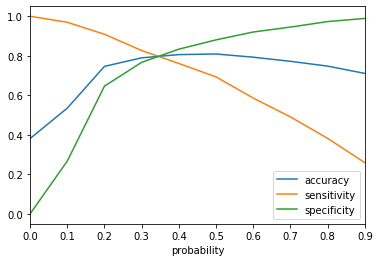

In [860]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [ ]:
#From the curve above, 0.33-0.35 is the optimum point to take it as a cutoff probability.

In [861]:
#Therefore, Final prediction will be
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.260483,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.213436,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.319942,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.820269,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.113179,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [862]:
#Finally, creating new column 'Lead Score' with where lead Score= Converted_prob*100
y_train_pred_final['Lead_Score']= y_train_pred_final.Converted_Prob.map(lambda x: x*100)

In [863]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.260483,1871,0,1,1,1,0,0,0,0,0,0,0,0,26.048267
1,0,0.213436,6795,0,1,1,1,0,0,0,0,0,0,0,0,21.343564
2,0,0.319942,3516,0,1,1,1,1,0,0,0,0,0,0,0,31.994165
3,0,0.820269,8105,1,1,1,1,1,1,1,1,1,1,0,1,82.026891
4,0,0.113179,3934,0,1,1,0,0,0,0,0,0,0,0,0,11.317863
